# Deep Neural Network on Image Dataset

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

We will be building a Neural Network to classify the images.

Here's a sample of the images:
<br>
<center><img src="https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width="75%"/></center>

Learn more the dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html) and [here](https://www.kaggle.com/c/cifar-10).

## Part 1: Setup CIFAR data

1. The dataset can be loaded using the `cifar10.load_data()` function. It's already split into training and test sets. Run the following code to load in the data and then determine the shape of each of the four numpy arrays.

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


2. Note that the feature matrices have four dimensions. Typically we have two dimensions: datapoints by features. In this case we have these four dimensions: datapoints, rows of image, column of image, rgb values. So `X_train[0]` is the first datapoint and will rgb values for each pixel. Since the images are 33 by 33, there will be 33 by 33 rgb values. Thus `X_train[0][0]` is the first row of pixels of the first datapoint. Print the rgb values of the first pixel of the first datapoint.

In [ ]:
X_train[0][0][0][0]

59

3. Run the following code to view 9 random images from the dataset.

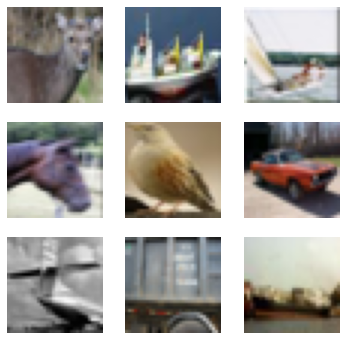

In [ ]:
from random import randint
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
for i in range(0, 9):
    plt.subplot(331 + i)
    plt.axis('off')
    plt.imshow(X_train[randint(0, X_train.shape[0] - 1)])

4. What the unique values in the target array? How many are there?

    Note that typically we have had two classes for classification problems but this is different!

In [ ]:
import numpy as np

print('Unique classes in train set: ', np.unique(y_train))
print('Unique classes in test set: ', np.unique(y_test))

Unique classes in train set:  [0 1 2 3 4 5 6 7 8 9]
Unique classes in test set:  [0 1 2 3 4 5 6 7 8 9]


5. Instead of using integer values for the target array, we need values to be either 0 or 1. We can do this by instead using a 2d array for the target values that looks like this:

    |   | airplane | automobile | bird | ... |
    |---|----------|------------|------|-----|
    | 0 | 0        | 0          | 1    | ... |
    | 1 | 1        | 0          | 0    | ... |
    | 2 | 1        | 0          | 0    | ... |
    
    Each row has exactly one 1. Here, datapoint 0 is a bird and datapoints 1 and 2 are airplanes.

    Convert the class vectors to binary class matrices with keras's `to_categorical` function. Create new target arrays: `y_train_bin` and `y_test_bin`

In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

y_train_bin = to_categorical(y_train)
y_test_bin = to_categorical(y_test)

y_train_bin.shape

(50000, 10)

6. Look at the first value in `y_train` and `y_train_bin` and verify that it looks correct.

In [ ]:
print('First value in y_train: ', y_train[0])
print('First value in y_train_bin: ', y_train_bin[0])

First value in y_train:  [6]
First value in y_train_bin:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


7. What are the max and min values of the feature matrices?

In [ ]:
print('Max and min values of train feature matrix: ', X_train.max(), X_train.min())
print('Max and min values of test feature matrix: ', X_test.max(), X_test.min())

Max and min values of train feature matrix:  255 0
Max and min values of test feature matrix:  255 0


8. Scale the feature data so the values range from 0 to 1 (divide by the maximum value). Call the new feature matrices `X_train_scaled` and `X_test_scaled`.

In [ ]:
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_test.max()

print('Max and min values of scaled train feature matrix: ', X_train_scaled.max(), X_train_scaled.min())
print('Max and min values of scaled test feature matrix: ', X_test_scaled.max(), X_test_scaled.min())

Max and min values of scaled train feature matrix:  1.0 0.0
Max and min values of scaled test feature matrix:  1.0 0.0


## Define and Build a Neural Network Model

1. Build a Convolutional Neural Network in Keras using a series of `Conv2D` and `Activation` layers.

    The model instatiation, first layer, and last layer are given. Add additional layers using the same `model.add()` method. Feel free to explore additional layers like `MaxPooling2D` and `Dropout`.
    
    Add as many layers as you want.

In [ ]:
#from keras.models import Sequential
#from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

num_classes = y_train_bin.shape[1]

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

2. Use the `model.summary()` method to look at the model.

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

3. Use the `model.compile()` method to build the model. Set the `loss` to `categorical_crossentropy`, the `optimizer` to `SGD()` and the `metrics` to `['accuracy']`.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy

model.compile(optimizer=SGD(),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

4. Use the `model.fit()` method to train the model.

    The `batch_size` is the number of samples before a backprop pass of weight updating. Set this to 32. The `epochs` is the number of passes over the complete dataset. Set this is 1 initially (so we can verify everything is correct). Set `verbose` to `True`. And give it the `validation_data` of `X_test_scaled, y_test_bin`.

In [ ]:
model.fit(X_train_scaled, y_train_bin,
                    batch_size=32, 
                    epochs=1,
                    verbose=True, 
                    validation_data=(X_test_scaled, y_test_bin))

1563/1563 [==============================] - 293s 187ms/step - loss: 2.1067 - accuracy: 0.2236 - val_loss: 1.8158 - val_accuracy: 0.3534


5. Use the `model.evaluate()` method to get the accuracy. Note that it returns two values. The first is the loss and the second is the accuracy, which is the value we care about.

In [ ]:
model.evaluate(X_test_scaled, y_test_bin)

313/313 [==============================] - 14s 45ms/step - loss: 1.8158 - accuracy: 0.3534


[1.8158053159713745, 0.35339999198913574]

## Task 3: Optimizing the Model

How could you change your model and training to improve performance?

It is a good idea to keep track of your experimental choices in a table


| Model Parameters | Training Accuracy | Test Accuracy |  
| ---------------- | ----------------- | ------------- |
| batch_size=64, epochs=20, dropout |         0.629        |      0.  643         |
|                  |                   |               |

Submit your table and your single best model.

Epoch 1/20
782/782 [==============================] - 284s 362ms/step - loss: 2.2903 - accuracy: 0.1242 - val_loss: 2.2302 - val_accuracy: 0.2094
Epoch 2/20
782/782 [==============================] - 285s 364ms/step - loss: 2.0972 - accuracy: 0.2260 - val_loss: 1.9556 - val_accuracy: 0.3133
Epoch 3/20
782/782 [==============================] - 276s 353ms/step - loss: 1.9280 - accuracy: 0.2969 - val_loss: 1.9297 - val_accuracy: 0.3117
Epoch 4/20
782/782 [==============================] - 280s 358ms/step - loss: 1.7871 - accuracy: 0.3471 - val_loss: 1.6790 - val_accuracy: 0.3934
Epoch 5/20
782/782 [==============================] - 276s 353ms/step - loss: 1.6925 - accuracy: 0.3764 - val_loss: 1.7238 - val_accuracy: 0.3857
Epoch 6/20
782/782 [==============================] - 275s 352ms/step - loss: 1.6043 - accuracy: 0.4128 - val_loss: 1.5705 - val_accuracy: 0.4218
Epoch 7/20
782/782 [==============================] - 274s 350ms/step - loss: 1.5261 - accuracy: 0.4402 - val_loss: 1.7655 -

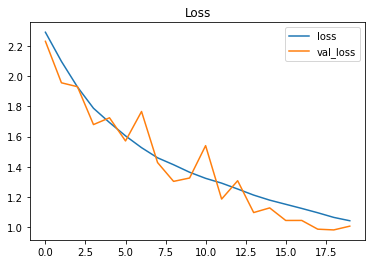

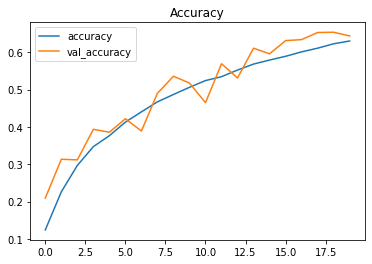

In [ ]:
#New Model: more epochs, batch size 64, and regularization

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=SGD(),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_bin,
                    batch_size=64, 
                    epochs=20,
                    verbose=True, 
                    validation_data=(X_test_scaled, y_test_bin))

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")